In [256]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import itertools

In [257]:
# Função para processar múltiplos arquivos de áudio e retornar o DataFrame
def processar_audios(arquivos_audio, categoria):

    # Inicializa uma lista para armazenar todos os dados
    dados_gerais = []

    # Loop para processar cada arquivo de áudio
    for arquivo in arquivos_audio:
        # Carrega o arquivo de áudio
        y, sr = librosa.load(arquivo)

        # Extraindo a transformada de Fourier (STFT)
        stft = np.abs(librosa.stft(y))

        # Convertendo a STFT para amplitude (em dB)
        amplitude_db = librosa.amplitude_to_db(stft, ref=np.max)

        # Gerando o array de tempos
        tempo = librosa.frames_to_time(np.arange(stft.shape[1]), sr=sr)

        # Gerando o array de frequências
        frequencia = librosa.fft_frequencies(sr=sr)

        # Criando uma tabela para o arquivo atual
        for i in range(len(tempo)):
            for j in range(len(frequencia)):
                # Adiciona uma linha com a categoria e as informações de tempo, frequência e amplitude
                dados_gerais.append([categoria, tempo[i], frequencia[j], amplitude_db[j, i]])

    # Convertendo todos os dados em um DataFrame
    df_geral = pd.DataFrame(dados_gerais, columns=['Categoria', 'Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)'])

    return df_geral

In [258]:
# Lista de arquivos de áudio (substitua com os nomes/caminhos corretos)
arquivos_audio_abrir = [
    '/content/abrir1.opus',
    '/content/abrir2.opus',
    '/content/abrir3.opus',
    '/content/abrir4.opus',
    '/content/abrir5.opus',
    '/content/abrir6.opus',
    '/content/abrir7.opus',
    '/content/abrir8.opus',
    '/content/abrir9.opus',
    '/content/abrir10.opus'
]

# Processa os áudios e retorna o DataFrame
df_abrir = processar_audios(arquivos_audio_abrir, "ABRIR")

In [259]:
df_abrir

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,ABRIR,0.000000,0.000000,-80.0
1,ABRIR,0.000000,10.766602,-80.0
2,ABRIR,0.000000,21.533203,-80.0
3,ABRIR,0.000000,32.299805,-80.0
4,ABRIR,0.000000,43.066406,-80.0
...,...,...,...,...
798470,ABRIR,2.136236,10981.933594,-80.0
798471,ABRIR,2.136236,10992.700195,-80.0
798472,ABRIR,2.136236,11003.466797,-80.0
798473,ABRIR,2.136236,11014.233398,-80.0


In [260]:
# Lista de arquivos de áudio (substitua com os nomes/caminhos corretos)
arquivos_audio_abrir = [
    '/content/fechar1.opus',
    '/content/fechar2.opus',
    '/content/fechar3.opus',
    '/content/fechar4.opus',
    '/content/fechar5.opus',
    '/content/fechar6.opus',
    '/content/fechar7.opus',
    '/content/fechar8.opus',
    '/content/fechar9.opus',
    '/content/fechar10.opus'
]

# Processa os áudios e retorna o DataFrame
df_fechar = processar_audios(arquivos_audio_abrir, "FECHAR")

In [261]:
df_fechar

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,FECHAR,0.000000,0.000000,-80.0
1,FECHAR,0.000000,10.766602,-80.0
2,FECHAR,0.000000,21.533203,-80.0
3,FECHAR,0.000000,32.299805,-80.0
4,FECHAR,0.000000,43.066406,-80.0
...,...,...,...,...
658045,FECHAR,1.764717,10981.933594,-80.0
658046,FECHAR,1.764717,10992.700195,-80.0
658047,FECHAR,1.764717,11003.466797,-80.0
658048,FECHAR,1.764717,11014.233398,-80.0


In [262]:
# Lista de arquivos de áudio (substitua com os nomes/caminhos corretos)
arquivos_audio_abrir = [
    '/content/ligar1.opus',
    '/content/ligar2.opus',
    '/content/ligar3.opus',
    '/content/ligar4.opus',
    '/content/ligar5.opus',
    '/content/ligar6.opus',
    '/content/ligar7.opus',
    '/content/ligar8.opus',
    '/content/ligar9.opus',
    '/content/ligar10.opus'
]

# Processa os áudios e retorna o DataFrame
df_ligar = processar_audios(arquivos_audio_abrir, "LIGAR")

In [263]:
df_ligar

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,LIGAR,0.000000,0.000000,-80.0
1,LIGAR,0.000000,10.766602,-80.0
2,LIGAR,0.000000,21.533203,-80.0
3,LIGAR,0.000000,32.299805,-80.0
4,LIGAR,0.000000,43.066406,-80.0
...,...,...,...,...
688795,LIGAR,1.555737,10981.933594,-80.0
688796,LIGAR,1.555737,10992.700195,-80.0
688797,LIGAR,1.555737,11003.466797,-80.0
688798,LIGAR,1.555737,11014.233398,-80.0


In [264]:
# Juntando todos os DataFrames no df_geral
df_geral = pd.concat([df_ligar, df_fechar, df_abrir], ignore_index=True)

In [265]:
df_geral

,Categoria,Tempo (s),Frequência (Hz),Amplitude (dB)
0,LIGAR,0.000000,0.000000,-80.0
1,LIGAR,0.000000,10.766602,-80.0
2,LIGAR,0.000000,21.533203,-80.0
3,LIGAR,0.000000,32.299805,-80.0
4,LIGAR,0.000000,43.066406,-80.0
...,...,...,...,...
2145320,ABRIR,2.136236,10981.933594,-80.0
2145321,ABRIR,2.136236,10992.700195,-80.0
2145322,ABRIR,2.136236,11003.466797,-80.0
2145323,ABRIR,2.136236,11014.233398,-80.0


In [266]:
df_geral.describe()

,Tempo (s),Frequência (Hz),Amplitude (dB)
count,2.145325e+06,2.145325e+06,2.145325e+06
mean,8.116556e-01,5.512500e+03,-7.371503e+01
std,4.903630e-01,3.185751e+03,1.336789e+01
min,0.000000e+00,0.000000e+00,-8.000000e+01
25%,3.947392e-01,2.756250e+03,-8.000000e+01
50%,7.894785e-01,5.512500e+03,-8.000000e+01
75%,1.207438e+00,8.268750e+03,-7.592039e+01
max,2.136236e+00,1.102500e+04,3.814697e-06


In [267]:
# Agrupar por 'Tempo (s)' e calcular a média para as outras colunas
df_geral = df_geral.groupby('Tempo (s)').agg({
    'Categoria': 'first',            # Mantém a primeira categoria encontrada para o tempo
    'Frequência (Hz)': 'mean',       # Calcula a média da frequência para cada tempo
    'Amplitude (dB)': 'mean'         # Calcula a média da amplitude para cada tempo
}).reset_index()

In [268]:
df_geral

,Tempo (s),Categoria,Frequência (Hz),Amplitude (dB)
0,0.000000,LIGAR,5512.5,-79.997047
1,0.023220,LIGAR,5512.5,-79.477203
2,0.046440,LIGAR,5512.5,-78.643913
3,0.069660,LIGAR,5512.5,-78.441818
4,0.092880,LIGAR,5512.5,-78.452225
...,...,...,...,...
88,2.043356,ABRIR,5512.5,-77.641777
89,2.066576,ABRIR,5512.5,-77.668327
90,2.089796,ABRIR,5512.5,-77.838165
91,2.113016,ABRIR,5512.5,-77.878906


In [269]:
df_geral.describe()

,Tempo (s),Frequência (Hz),Amplitude (dB)
count,93.000000,93.0,93.000000
mean,1.068118,5512.5,-74.305809
std,0.626724,0.0,4.440101
min,0.000000,5512.5,-79.997047
25%,0.534059,5512.5,-78.285576
50%,1.068118,5512.5,-75.325729
75%,1.602177,5512.5,-71.371056
max,2.136236,5512.5,-65.608208


In [270]:
# Separando os atributos e os rótulos
X = df_geral[['Tempo (s)', 'Frequência (Hz)', 'Amplitude (dB)']]
y = df_geral['Categoria']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [271]:
# Função para tratar empates aleatoriamente
def resolve_tie(predictions):
    unique, counts = np.unique(predictions, return_counts=True)
    max_count = np.max(counts)
    ties = unique[counts == max_count]
    if len(ties) > 1:
        return random.choice(ties)  # Escolhe aleatoriamente entre os empates
    return ties[0]

In [272]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Configuração dos parâmetros para o GridSearchCV
param_grid = {
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__gamma': [0.01, 0.1, 1, 10, 100]  # 'gamma' é o parâmetro do kernel scale
}

# Instanciar o classificador SVM com a abordagem OneVsRest
svm = SVC(decision_function_shape='ovr')
ovr_svm = OneVsRestClassifier(svm)

# Configurar o KFold e GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=ovr_svm, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=1)

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [273]:
# Resultados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'estimator__C': 0.01, 'estimator__gamma': 100, 'estimator__kernel': 'poly'}


In [274]:
# Usar o parâmetro zero_division=0 para evitar os avisos de métricas indefinidas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))  # zero_division=0 evita divisão por zero

Relatório de Classificação:
              precision    recall  f1-score   support

       ABRIR       1.00      0.67      0.80         3
      FECHAR       0.00      0.00      0.00         0
       LIGAR       1.00      1.00      1.00        25

    accuracy                           0.96        28
   macro avg       0.67      0.56      0.60        28
weighted avg       1.00      0.96      0.98        28



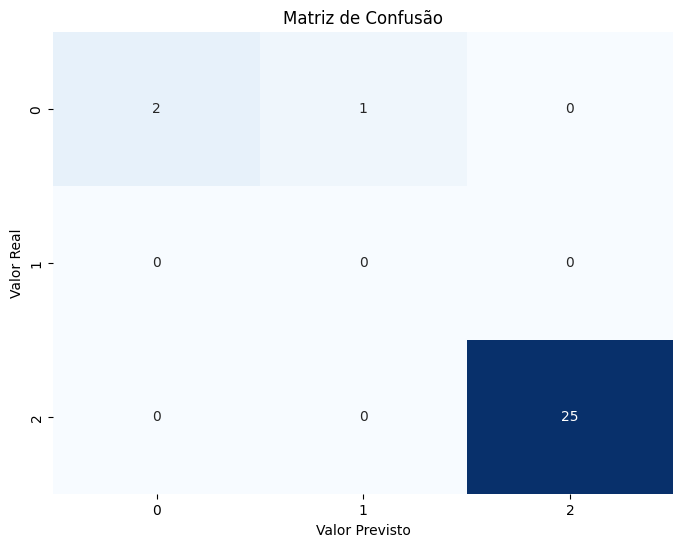

In [275]:
tabela_confusao = confusion_matrix(y_test, y_pred)
# Exibir a matriz de confusão com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(tabela_confusao, annot=True, cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

In [276]:
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))


Acurácia:
0.9642857142857143
